In [16]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import spacy
import re
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_selection import RFE,RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, make_scorer
from sklearn.metrics import roc_curve, precision_recall_curve, auc, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
df = pd.read_csv('marketing_data3.csv')
df.head()

,target,duration,age,gender,creditFailure,accountBalance,house,credit,numberOfContacts,daySinceLastCampaign,...,divorced,married,single,cellPhone,landline,contacttype_unknown,highSchool,secondarySchool,uniGraduated,edu_unknown
0,0,166,30,0,0,-202,0,0,2,-1.0,...,0,1,0,0,0,1,1,0,0,0
1,0,183,42,0,0,2463,0,0,2,-1.0,...,0,1,0,1,0,0,0,0,1,0
2,0,227,26,0,0,2158,1,1,1,-1.0,...,0,0,1,0,1,0,1,0,0,0
3,0,31,34,1,1,75,1,0,3,-1.0,...,1,0,0,0,0,1,0,0,1,0
4,0,1231,48,1,0,559,1,0,2,-1.0,...,0,1,0,0,0,1,0,1,0,0


In [3]:
from sklearn.model_selection import train_test_split

df_sorted = df.sort_values('daySinceLastCampaign')

X = df_sorted.drop('target', axis=1)
y = df_sorted['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (25180, 48) (25180,)
Testing set shape: (6296, 48) (6296,)


In [4]:
## Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state =42)

dt_accuracy = cross_val_score(dt,X_train,y_train.values.ravel(), cv=3, scoring ='accuracy')
dt_f1 = cross_val_score(dt,X_train,y_train.values.ravel(), cv=3, scoring ='f1')

print('dt_accuracy: ' +str(dt_accuracy))
print('dt F1_Macro Score: '+str(dt_f1))
print('dt_accuracy_avg: ' + str(dt_accuracy.mean()) +'  |  dt_f1_avg: '+str(dt_f1.mean())+'\n')

dt_accuracy: [0.88694305 0.8900274  0.88871679]
dt F1_Macro Score: [0.39592616 0.4041317  0.41770574]
dt_accuracy_avg: 0.8885624153836704  |  dt_f1_avg: 0.4059211984036331



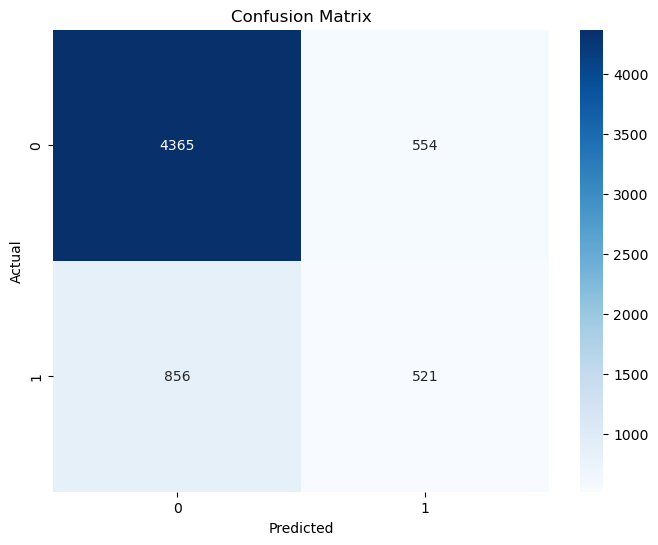

In [5]:
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

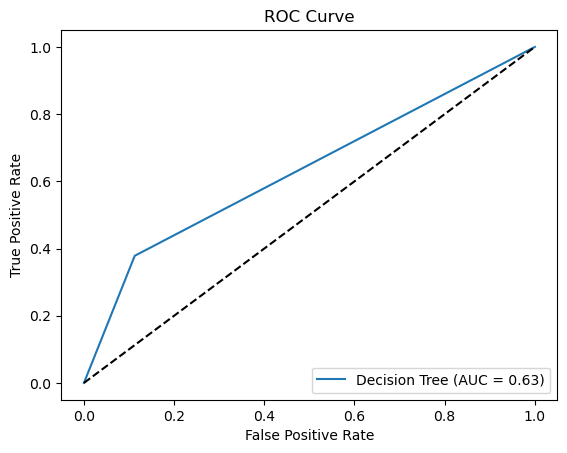

In [8]:
y_pred_prob = dt.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

auc_score = roc_auc_score(y_test, y_pred_prob)

plt.plot(fpr, tpr, label='Decision Tree (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [9]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42, max_iter = 2000, class_weight = 'balanced')

lr_accuracy = cross_val_score(lr,X_train,y_train.values.ravel(), cv=3, scoring ='accuracy')
lr_f1 = cross_val_score(lr,X_train,y_train.values.ravel(), cv=3, scoring ='f1')

print('lr_accuracy: ' +str(lr_accuracy))
print('lr F1_Macro Score: '+str(lr_f1))
print('lr_accuracy_avg: ' + str(lr_accuracy.mean()) +'  |  lr_f1_avg: '+str(lr_f1.mean())+'\n')

lr_accuracy: [0.84214915 0.84713452 0.83712618]
lr F1_Macro Score: [0.49136276 0.49941475 0.48820666]
lr_accuracy_avg: 0.8421366158642458  |  lr_f1_avg: 0.4929947254760188



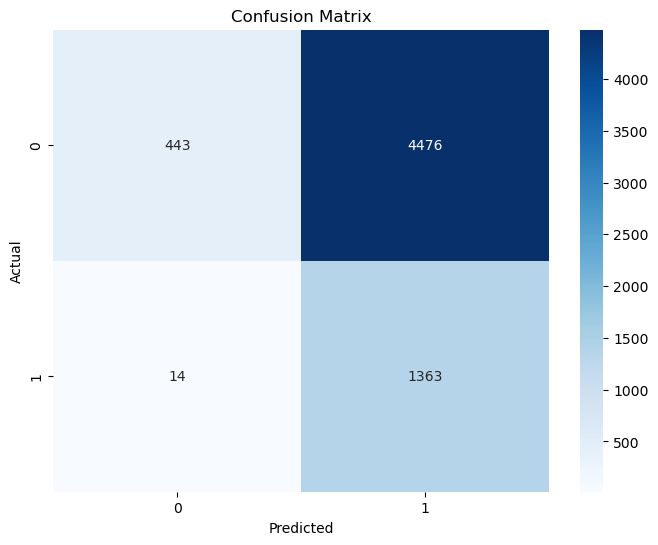

In [10]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

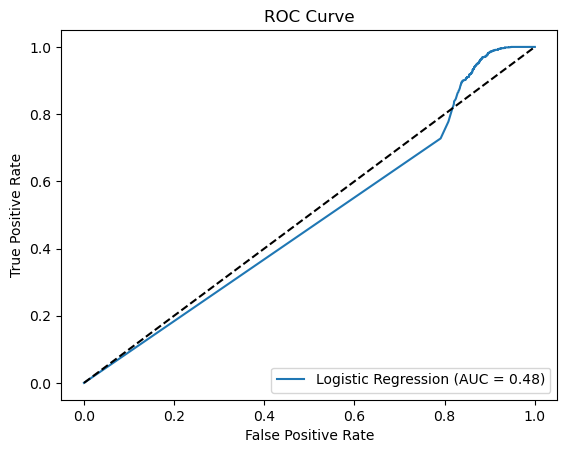

In [11]:
y_pred_prob = lr.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

auc_score = roc_auc_score(y_test, y_pred_prob)

plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [12]:
## Random Forest
forest = RandomForestClassifier(n_estimators=100, random_state=42)

forest_accuracy = cross_val_score(forest,X_train,y_train.values.ravel(), cv=3, scoring ='accuracy')
forest_f1 = cross_val_score(forest,X_train,y_train.values.ravel(), cv=3, scoring ='f1')

print('random forest_accuracy: ' +str(forest_accuracy))
print('random forest F1_Macro Score: '+str(forest_f1))
print('random forest_accuracy_avg: ' + str(forest_accuracy.mean()) +'  |  forest_f1_avg: '+str(forest_f1.mean())+'\n')

random forest_accuracy: [0.91553491 0.91612058 0.91504825]
random forest F1_Macro Score: [0.36639857 0.36804309 0.3524069 ]
random forest_accuracy_avg: 0.9155679123513291  |  forest_f1_avg: 0.3622828536462728



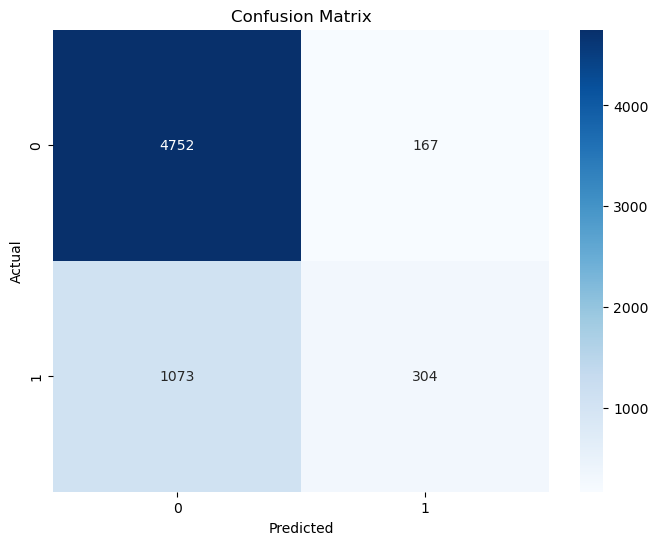

In [13]:
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

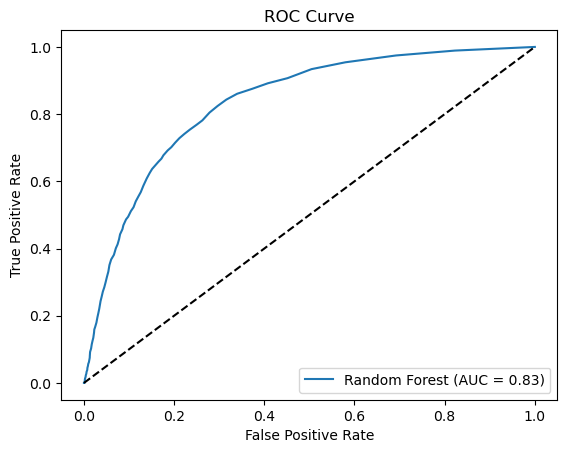

In [14]:
y_pred_prob = forest.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

auc_score = roc_auc_score(y_test, y_pred_prob)

plt.plot(fpr, tpr, label='Random Forest (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Looks like the Random Forest Model is the model with the best performance.

In [15]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the entire dataset
rf_model.fit(X, y)

# Retrieve the feature importances from the trained model
importances = rf_model.feature_importances_

# Create a DataFrame to display the feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Print the feature importances
print(feature_importances)

                         Feature  Importance
0                       duration    0.286961
4                 accountBalance    0.116534
1                            age    0.098821
24                   lcr_success    0.087915
8           daySinceLastCampaign    0.047062
7               numberOfContacts    0.035875
5                          house    0.019942
17                           mar    0.017122
16                           jun    0.015177
9   numberOfContactsLastCampaign    0.014863
2                         gender    0.013439
10                           apr    0.012683
43           contacttype_unknown    0.012592
20                           oct    0.012125
46                  uniGraduated    0.009898
34                     technical    0.009869
29                       manager    0.009861
18                           may    0.009645
39                       married    0.009638
44                    highSchool    0.009002
26                administrative    0.008560
6         

Of the features, looks like duration, account balance, and age are the top 3 that determine the outcome of the marketing campaign.

Let's try a couple more models and see how they compare.

In [18]:
## Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)

gb_model_accuracy = cross_val_score(gb_model,X_train,y_train.values.ravel(), cv=3, scoring ='accuracy')
gb_model_f1 = cross_val_score(gb_model,X_train,y_train.values.ravel(), cv=3, scoring ='f1')

print('gb_model_accuracy: ' +str(gb_model_accuracy))
print('gb_model F1_Macro Score: '+str(gb_model_f1))
print('gb_model_accuracy_avg: ' + str(gb_model_accuracy.mean()) +'  |  gb_model_f1_avg: '+str(gb_model_f1.mean())+'\n')

gb_model_accuracy: [0.91827496 0.91826522 0.91969498]
gb_model F1_Macro Score: [0.42737896 0.44766506 0.44844517]
gb_model_accuracy_avg: 0.9187450544120773  |  gb_model_f1_avg: 0.4411630643839017



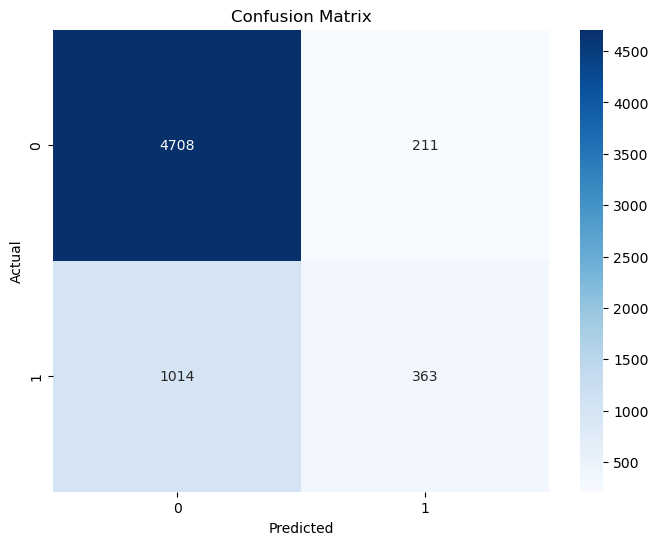

In [19]:
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

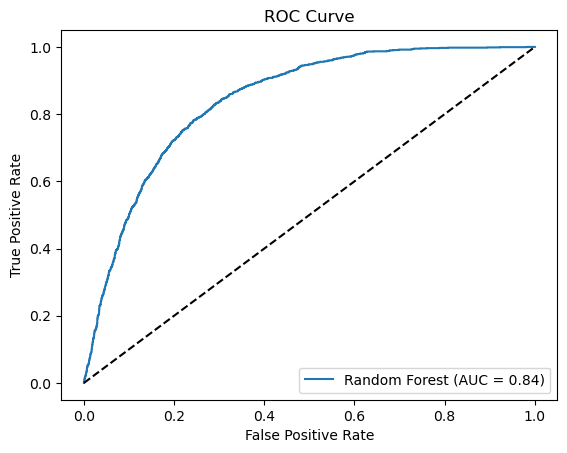

In [20]:
y_pred_prob = gb_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

auc_score = roc_auc_score(y_test, y_pred_prob)

plt.plot(fpr, tpr, label='Random Forest (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Gradient Boosting Classifier is almost just as good as the Random Forest Model, but not quite, let's go with Random Forest.

In [21]:
new_data_predictions = forest.predict(X_test)

In [22]:
print(new_data_predictions)

[0 0 0 ... 0 0 0]


In [23]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.81
